In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.misc as misc
import glob
import os
import pdb
import copy

In [ ]:
def watershed(fname):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    pdb.set_trace()
    dist_transform = cv2.distanceTransform(gray,1,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    plt.imshow(markers)
    #plt.show()
    
    box = []
    pdb.set_trace()
    cimg,contours,hierarchy = cv2.findContours(sure_fg,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    for i in range(len(contours)):
        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)
        x1 = max(1,x-5)
        y1 = max(1,y-5)
        x2 = min(x+w,img.shape[1])
        y2 = min(y+h,img.shape[0])
        box.append([x1,y1,x2,y2])
    #    print(x1,y1,x2,y2)
        new = cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    plt.imshow(new)
    plt.imsave('new.png',new)
    plt.show()
    return box

def watershed2(fname):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    pdb.set_trace()
    dist_transform = cv2.distanceTransform(gray,1,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.05*dist_transform.max(),255,0)
    sure_fg = np.uint8(sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    #plt.imshow(markers)
    #plt.show()
    
    boxes = []
    masks = []
    
    instance_label = 1
    
    while True:
        one_marker = np.where(markers == instance_label , 1,0)
        one_marker = np.uint8(one_marker)
        one_marker_contour = copy.deepcopy(one_marker)
        if np.max(one_marker) == 0:
            break
        #pdb.set_trace()
        cimg,contours,hierarchy = cv2.findContours(one_marker_contour,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        assert len(contours) == 1
        cnt = contours[0]
        x,y,w,h = cv2.boundingRect(cnt)
        x1 = max(1,x-2)
        y1 = max(1,y-2)
        x2 = min(x+w+2,img.shape[1])
        y2 = min(y+h+2,img.shape[0])
        boxes.append([x1,y1,x2,y2])
        masks.append(copy.deepcopy(one_marker[y1:y2,x1:x2]))
        #plt.imshow(one_marker)
        #new = cv2.rectangle(one_marker*100,(x1,y1),(x2,y2),(0,255,0),2)
        #plt.imshow(new)
        a = np.int32(np.round(cv2.resize(np.float32(masks[-1]),(14,14))))
        #a=masks[-1]
        plt.imshow(a)
        print(np.max(a))
        plt.show()
        instance_label = instance_label + 1
        
    return boxes,masks
    
def clip(image,mask,imageOut,maskOut):
    masktmp = misc.imread(mask)
    if len(masktmp.shape)==3:
        mask2 = np.sum(masktmp,axis=2)
    else:
        mask2 = masktmp
    ax_x = np.sum(mask2,axis=0)
    ax_y = np.sum(mask2,axis=1)

    print(len(ax_x))
    for i in range(len(ax_x)):
        if ax_x[i] != 0:
            break
    y1 = i

    for i in range(len(ax_x)):
        if ax_x[len(ax_x)-i-1] != 0:
            break
    y2 = len(ax_x) - i-1

    for i in range(len(ax_y)):
        if ax_y[i] != 0:
            break
    x1 = i

    for i in range(len(ax_y)):
        if ax_y[len(ax_y)-i-1] != 0:
            break
    x2 = len(ax_y) - i -1

    #maskclipped = misc.imread(mask)[x1:x2,y1:y2]
    #imageclipped = misc.imread(image)[int(x1*1.0/len(ax_y)*388):int(x2*1.0/len(ax_y)*388),int(y1*1.0/len(ax_x)*388):int(y2*1.0/len(ax_x)*388)]
    #misc.imsave('imageOut.png',imageclipped)
    #misc.imsave('maskOut.png',maskclipped)   


def run(fpath,savename,MULTI_BBOX):
    fpath = '/Users/wang/work/processingData/data/mask_test/'
    fnames = glob.glob(os.path.join(fpath,'*.png'))
    with open(savename,'w') as savefile:
        for fname in fnames:
            print(fname)
            if MULTI_BBOX:
                coords = watershed(fname)
                for coord in coords:
                    savefile.write("%s,%d,%d,%d,%d,%s\n"%(fname,coord[0],coord[1],coord[2],coord[3],'node'))
            else:
                boxes = watershed(fname)
                boxes = np.array(boxes)
                coord = np.zeros(4)
                coord[0],coord[1] = min(boxes[:,0]),min(boxes[:,1])
                coord[2],coord[3] = max(boxes[:,2]),max(boxes[:,3])
                savefile.write("%s,%d,%d,%d,%d,%s\n"%(fname,coord[0],coord[1],coord[2],coord[3],'node'))



#run('/Users/wang/work/processingData/data/mask_test/',savename='singlelabel.txt',MULTI_BBOX=False)
watershed2('/Users/wang/work/processingData/data/mask_test/pw0310965_11_38.png')

> <ipython-input-4-9f925abc4896>(35)watershed2()
-> dist_transform = cv2.distanceTransform(gray,1,5)
(Pdb) np.max(gray)
100


(518, 768, 3)


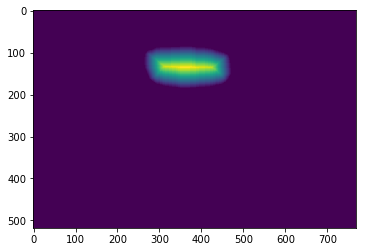

In [8]:
    fname = '/Users/wang/work/processingData/data/mask_test/Rx-g4.png'
    img = cv2.imread(fname)
    print(img.shape)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    dist_transform = cv2.distanceTransform(gray,1,5)
    plt.imshow(dist_transform)
    plt.show()


In [20]:
def run2(savename='multilabel.txt'):
    fpath = '/Users/wang/work/processingData/data/img_train/'
    mpath = '/Users/wang/work/processingData/data/mask_train/'
    sfpath = '/afs/crc.nd.edu/user/h/hwang21/work/keras_my/data/img_train/'
    smpath = '/afs/crc.nd.edu/user/h/hwang21/work/keras_my/data/mask_train/'
    fnames = glob.glob(os.path.join(fpath,'*.png'))
    with open(savename,'w') as savefile:
        for fname in fnames:
            sfname = os.path.join(sfpath,fname.split('/')[-1])
            smname = os.path.join(smpath,fname.split('/')[-1])
            savefile.write("%s,%s,%s\n"%(sfname,smname,'node'))
run2()

In [4]:
np.int32(cv2.imread('/Users/wang/work/processingData/data/mask_test/pw0310965_11_38.png'))


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ..., 
       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ..., 
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int32)

In [5]:
np.random.rand(3
              )

array([ 0.16512462,  0.46026515,  0.98264646])

In [17]:
a = np.ones((4,4,3))
b= np.random.rand(3)
(a*b).shape


(4, 4, 3)

In [37]:
i

(14, 14)
(14, 14, 1)
(14, 14, 3)
